In [3]:
import pandas as pd
#from config import api_key
import matplotlib.pyplot as plt
import requests

In [4]:
import pandas as pd

# Define the excluded zip codes
excluded_zipcodes = [
    60546, 60475, 60099, 60513, 60804, 60406, 60445, 60472, 46327, 60958,
    60411, 60438, 60453, "60445-2831", 60827, 60419, 60409, 60914, 60440,
    60153, "60440-2515", 60501, 60085, 60426, 60304, 60429, 60087, 60402,
    60805, 60504, 60064, "60418-2345", 60431, 60466, 60429, 60445, 60469,
    "60469-1036", 60133, 60099, 61761, 60153, 60406, 60472, "60418-2345",
    60546, 60586, 60805, 60431, 60501, 60914, 60411, 60453, 60827, 60419,
    60438, 46324, 60104, 46310, 60475, 60031, 60440, "60440-2515", 60466,
    "60418-1188", "60445-2714", 60958, 47909, 60426, 60428, 60803, 60707,
    46327, 60101, 60181, 60459, "60445-2831", 60160, 6541, "60406-1256",
    "60406-2236", 60402, 60901, "60445-2811", 60418, 60458, 60171, 60409
]

# Read the CSV files into DataFrames
FY23_df = pd.read_csv('/Users/paolamoreno/Desktop/Classwork/Project 1/FY23.csv')
FY24_df = pd.read_csv('/Users/paolamoreno/Desktop/Classwork/Project 1/FY24.csv')

# Combine the DataFrames
filtered_df = pd.concat([FY23_df, FY24_df])

# Filter out the excluded zip codes
filtered_df = filtered_df[~filtered_df['patient zip'].isin(excluded_zipcodes)]

# Display the filtered DataFrame
print(filtered_df)



      patient id check in date appt date  patient age patient zip school code  \
0          11115       1/31/23   1/31/23           17       60639         331   
1          11115       1/31/23   1/31/23           17       60639         331   
2          11115       1/31/23   1/31/23           17       60639         331   
3          11115       1/31/23   1/31/23           17       60639         331   
4          11115       5/24/23   5/24/23           17       60639         331   
...          ...           ...       ...          ...         ...         ...   
2336       23232       3/15/24   3/15/24            6       60085       152.0   
2337       23233       3/15/24   3/15/24            8       60085       152.0   
2338       23233       3/15/24   3/15/24            8       60085       152.0   
2339       23237       3/25/24   3/25/24            6       60619       182.0   
2340       23237       3/25/24   3/25/24            6       60619       182.0   

           appt type  act s

In [5]:
# Concatenate the DataFrames
filtered_df = pd.concat([FY23_df, FY24_df])

# Remove rows with exactly the same values
filtered_df = filtered_df.drop_duplicates()

# Convert 'appt date' column to datetime format
filtered_df['appt date'] = pd.to_datetime(filtered_df['appt date'], format='%m/%d/%y')

# Sort the combined DataFrame by the 'appt date' column
sorted_df = filtered_df.sort_values(by='appt date')

sorted_df


,patient id,check in date,appt date,patient age,patient zip,school code,appt type,act score,school days missed,er visits,hospitalizations
5776,20788,3/16/23,2022-07-13,9,60629,334,SKIN TEST 45,17.0,10.0,0.0,0.0
4176,17896,3/22/23,2022-07-13,7,60629,334,NEW PATIENT 45,24.0,0.0,2.0,8.0
1520,13403,6/29/23,2022-07-13,9,60629,NaN,NEW PATIENT 45,15.0,0.0,0.0,0.0
524,11825,6/29/23,2022-07-13,11,60629,334,NEW PATIENT 45,24.0,0.0,0.0,0.0
5735,20749,3/15/23,2022-07-13,5,60629,334,NEW PATIENT 45,99.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1457,21723,3/28/24,2024-03-28,13,60632,310.0,Telehealth,NaN,NaN,NaN,NaN
1456,21723,3/28/24,2024-03-28,13,60632,310.0,Telehealth,25.0,0.0,0.0,0.0
1408,21443,3/28/24,2024-03-28,16,60632,310.0,Telehealth,20.0,0.0,0.0,0.0
1152,19705,3/28/24,2024-03-28,14,60632,310.0,Telehealth,24.0,0.0,0.0,0.0


In [6]:
# Count the number of unique values in the 'column_name' column
unique_values_count = sorted_df['patient id'].nunique()

print("Unique Patient ID's:", unique_values_count)

Unique Patient ID's: 1115


## What are the most common patient zip codes, how many patients are in each?

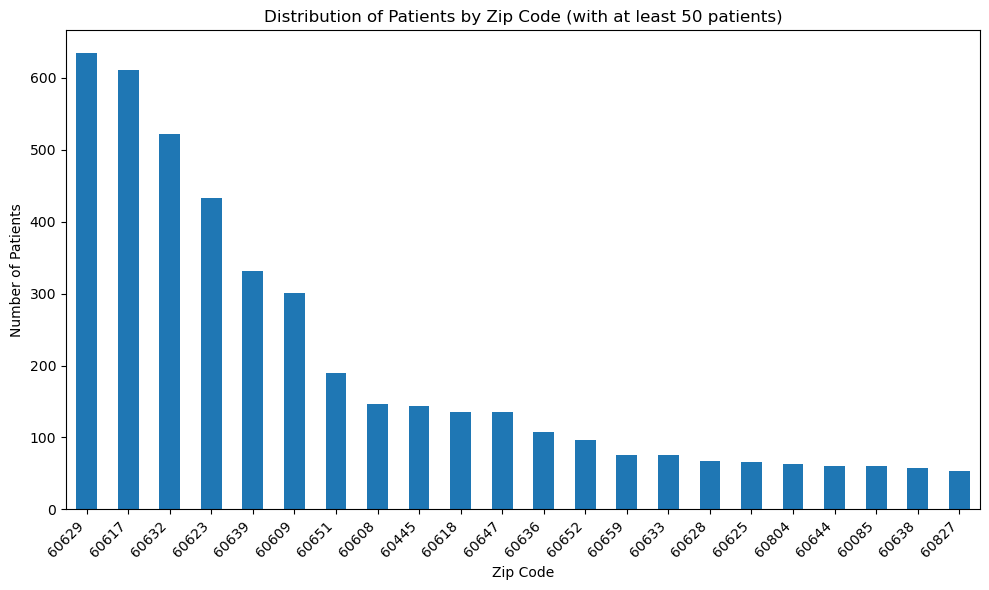

In [7]:
# Calculate the counts of patients for each zip code
zip_counts =sorted_df['patient zip'].value_counts()

# Filter zip codes with fewer than 50 patients
zip_counts_filtered = zip_counts[zip_counts >= 50]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
zip_counts_filtered.plot(kind='bar')
plt.title('Distribution of Patients by Zip Code (with at least 50 patients)')
plt.xlabel('Zip Code')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
import requests
from tabulate import tabulate

# Function to preprocess the ZIP code
def preprocess_zip(zip_code):
    # Remove the additional four digits after the hyphen, if present
    return zip_code.split('-')[0]

# Function to get latitude and longitude for a given ZIP code
def get_lat_lon(zip_code):
    zip_code = preprocess_zip(zip_code)
    url = f"http://api.openweathermap.org/geo/1.0/zip?zip={zip_code},us&appid=982bb93d5b33d0f5dc65858279858f90"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            lat = data['lat']
            lon = data['lon']
            return lat, lon
        else:
            print(f"Failed to retrieve coordinates for ZIP code {zip_code}")
            return None, None
    except requests.RequestException as e:
        print(f"Error connecting to the API: {e}")
        return None, None

# Extract unique patient zip codes from the sorted DataFrame
unique_zip_codes = sorted_df['patient zip'].unique()

# Initialize a dictionary to store AQI data
aqi_data = {}

# Loop through each unique patient zip code
for zip_code in unique_zip_codes:
    # Get latitude and longitude for the current ZIP code
    lat, lon = get_lat_lon(zip_code)
    
    # Check if latitude and longitude are obtained successfully
    if lat is not None and lon is not None:
        # Construct the API URL to retrieve air pollution data
        url = f'https://api.openweathermap.org/data/2.5/air_pollution?lat={lat}&lon={lon}&appid=982bb93d5b33d0f5dc65858279858f90'
        
        try:
            # Make the API request
            response = requests.get(url)
            
            # Check if the request was successful
            if response.status_code == 200:
                # Parse the JSON response
                data = response.json()
                
                # Extract the AQI value
                aqi = data['list'][0]['main']['aqi']
                
                # Store the AQI value for the zip code
                aqi_data[zip_code] = aqi
            else:
                print(f"Failed to retrieve AQI data for zip code {zip_code}")
        except requests.RequestException as e:
            print(f"Error connecting to the API: {e}")
    else:
        print(f"Failed to retrieve latitude and longitude for zip code {zip_code}")

# Create a list to store rows of the table
table_data = []

# Add headers to the table
headers = ["Zip Code", "AQI"]

# Iterate through the AQI data dictionary and populate the table
for zip_code, aqi in aqi_data.items():
    table_data.append([zip_code, aqi])

# Print the table
print("AQI data:")
print(tabulate(table_data, headers=headers, tablefmt="grid"))


AQI data:
+------------+-------+
| Zip Code   |   AQI |
+============+=======+
| 60629      |     2 |
+------------+-------+
| 60639      |     2 |
+------------+-------+
| 60472      |     2 |
+------------+-------+
| 60623      |     2 |
+------------+-------+
| 60644      |     2 |
+------------+-------+
| 60651      |     2 |
+------------+-------+
| 60647      |     2 |
+------------+-------+
| 60617      |     2 |
+------------+-------+
| 60609      |     2 |
+------------+-------+
| 60632      |     2 |
+------------+-------+
| 60633      |     2 |
+------------+-------+
| 60622      |     2 |
+------------+-------+
| 60636      |     2 |
+------------+-------+
| 60632-2907 |     2 |
+------------+-------+
| 60419      |     2 |
+------------+-------+
| 60625      |     2 |
+------------+-------+
| 60639-3108 |     2 |
+------------+-------+
| 60707      |     2 |
+------------+-------+
| 60628      |     2 |
+------------+-------+
| 60659      |     2 |
+------------+-------+
|

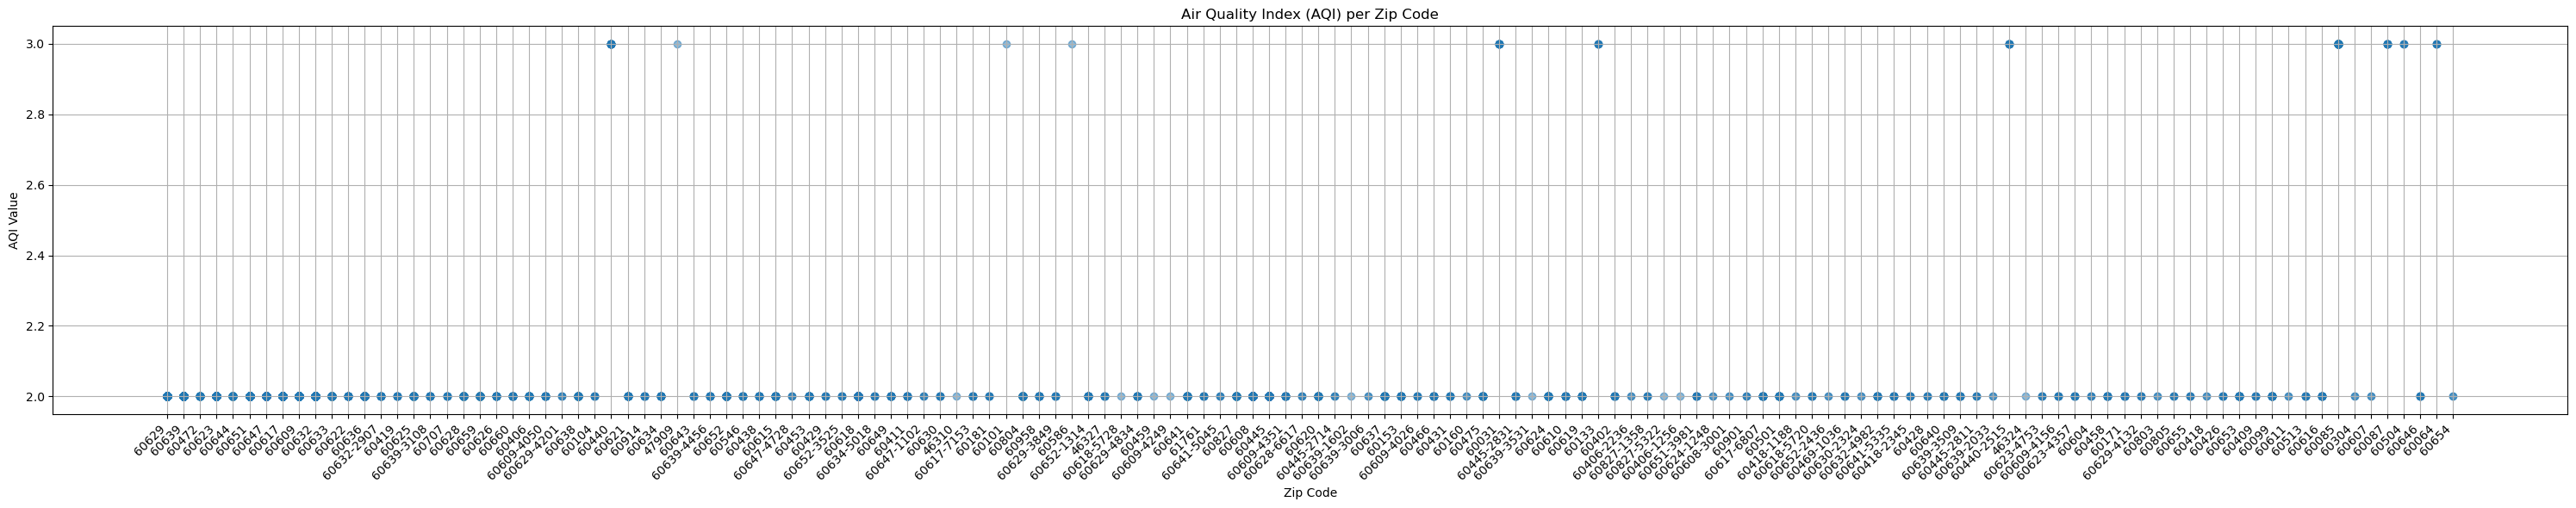

In [9]:
import matplotlib.pyplot as plt

# Extracting zip codes and AQI values from the data
zip_codes = sorted_df['patient zip']
aqi_values = []

# Synchronizing AQI data with zip codes
for zip_code in zip_codes:
    aqi = aqi_data.get(zip_code)
    if aqi is not None:
        aqi_values.append(aqi)
    else:
        aqi_values.append(None)  # Append None for missing AQI values

# Creating the scatter plot
plt.figure(figsize=(30, 6))  # Increase figure width to provide more space for labels
plt.scatter(zip_codes, aqi_values, alpha=0.5)
plt.title('Air Quality Index (AQI) per Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('AQI Value')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
# Iterate through unique zip codes
for zip_code in sorted_df['patient zip'].unique():
    # Filter DataFrame for the current zip code and AQI greater than 0
    filtered_df = sorted_df[(sorted_df['patient zip'] == zip_code) & (sorted_df['patient zip'].isin(aqi_data.keys()))]
    # Check if there are any records for the current zip code
    if not filtered_df.empty:
        # Print zip code in bold red text
        print(f"\033[1;31mZip Code: {zip_code}\033[0m")
        print("-------------------------------")
        # Print AQI information
        aqi = aqi_data[zip_code]
        if aqi == 1:
            # Print AQI in bold green if it's 1 (Good)
            print("\033[1;32mAQI Level: Good\033[0m")
        elif aqi == 2:
            # Print AQI in bold yellow if it's 2 (Fair)
            print("\033[1;33mAQI Level: Fair\033[0m")
        elif aqi == 3:
            # Print AQI in bold white if it's 3 (Moderate)
            print("\033[1;37mAQI Level: Moderate\033[0m")
        elif aqi == 4:
            # Print AQI in bold red if it's 4 (Poor)
            print("\033[1;31mAQI Level: Poor\033[0m")
        elif aqi == 5:
            # Print AQI in bold magenta if it's 5 (Very Poor)
            print("\033[1;35mAQI Level: Very Poor\033[0m")
        print("Patient IDs:")
        # Print unique patient IDs
        for patient_id in filtered_df['patient id'].unique():
            print(patient_id)
        print("\n")


Zip Code: 60629
-------------------------------
AQI Level: Fair
Patient IDs:
20788
17896
13403
11825
20749
13949
18246
16522
12307
12974
19924
12395
14214
19014
15793
15791
18252
14834
21549
20001
18805
18849
21886
16513
11138
12595
17238
16067
13440
13436
13077
16280
19772
13101
17435
13902
20271
21814
19482
11137
16288
13516
17263
19733
19728
20251
21114
13256
20961
16081
15231
13745
17338
13096
21777
13591
17067
22250
22254
11223
20566
17550
14604
20765
22299
12976
22298
11234
22310
22316
12038
15229
16373
22351
14959
12282
12059
16213
16208
22405
22404
22403
21927
22408
21462
15980
21450
20814
18177
12099
17437
22416
22483
22536
14255
22685
22682
22695
22696
22703
22698
22699
22702
22733
22813
22774
22908
21644
22968
22997
22996
22994
22995
23024
23031
22311
23040
23131
23133
23146
23144
23217


Zip Code: 60639
-------------------------------
AQI Level: Fair
Patient IDs:
18817
18215
18219
12968
14173
12531
20122
13599
17620
16663
18627
18631
17397
20372
13153
20510
11115
21682
2001

In [12]:
import folium
from folium.plugins import MarkerCluster
import webbrowser

# Function to get latitude and longitude for a given ZIP code
def get_lat_lon(zip_code):
    zip_code = preprocess_zip(zip_code)
    url = f"http://api.openweathermap.org/geo/1.0/zip?zip={zip_code},us&appid=982bb93d5b33d0f5dc65858279858f90"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            lat = data['lat']
            lon = data['lon']
            return lat, lon
        else:
            print(f"Failed to retrieve coordinates for ZIP code {zip_code}")
            return None, None
    except requests.RequestException as e:
        print(f"Error connecting to the API: {e}")
        return None, None

# Filter DataFrame for specified zip codes
excluded_zipcodes = ['60546', '60475', '60099', '60513', '60804', '60406', '60445', '60472', '46327', '60958',
                     '60411', '60438', '60453', '60445-2831', '60827', '60419', '60409', '60914', '60440',
                     '60153', '60440-2515', '60501', '60085', '60426', '60304', '60429', '60087', '60402',
                     '60805', '60504', '60064', '60418-2345', '60431', '60466', '60804', '60429', '60445',
                     '60469-1036', '60133', '60099', '61761', '60153', '60406', '60472', '60418-2345', '60546',
                     '60586', '60805', '60431', '60501', '60914', '60411', '60453', '60827', '60419', '60438',
                     '46324', '60104', '46310', '60475', '60031', '60440', '60440-2515', '60466', '60418-1188',
                     '60445-2714', '60958', '47909', '60426', '60428', '60803', '60707', '46327', '60101',
                     '60181', '60459', '60445-2831', '60160', '6541', '60406-1256', '60406-2236', '60402',
                     '60901', '60445-2811', '60418', '60458', '60171', '60409']

filtered_df = sorted_df[~sorted_df['patient zip'].isin(excluded_zipcodes)]

# Create a map centered around Chicago
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Create a MarkerCluster to add markers for patient IDs
marker_cluster = MarkerCluster().add_to(chicago_map)

# Iterate through unique zip codes
for zip_code in filtered_df['patient zip'].unique():  # Use filtered_df instead of sorted_df
    # Filter DataFrame for the current zip code
    zip_filtered_df = filtered_df[filtered_df['patient zip'] == zip_code]
    # Check if there are any records for the current zip code
    if not zip_filtered_df.empty:
        # Retrieve latitude and longitude for the zip code
        lat, lon = get_lat_lon(zip_code)
        if lat is not None and lon is not None:  # Ensure latitude and longitude are available
            # Create a popup message with patient IDs
            popup_message = "<b>Zip Code: {}</b><br><b>Patient IDs:</b><br>".format(zip_code)
            popup_message += "<ul>"
            for patient_id in zip_filtered_df['patient id']:
                popup_message += "<li>{}</li>".format(patient_id)
            popup_message += "</ul>"
            # Create a marker for the zip code with the popup message
            folium.Marker(location=[lat, lon], popup=popup_message, icon=folium.Icon(color='blue')).add_to(marker_cluster)

# Save the map as HTML file
chicago_map.save('chicago_patient_map.html')

# Open the map in the default web browser
webbrowser.open('chicago_patient_map.html')


True